# Find out the acquisition times of bam files from their filenames

In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("../../templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath('../../lib/PythonGbinReader/GbinReader/'))
import gbin_reader

In [41]:
obsfiles = []

#for prefix in ['../../datasets/gbins/bam/2017-09-Precursor/', '../../datasets/gbins/bam/2017-09-11/','../../datasets/gbins/bam/2017-09-Tail/']:
for prefix in ['../../datasets/gbins/bam/2017-07/']:
    obsfiles += [prefix+file for file in os.listdir(prefix) if ".gbin" in file]
# sort them
#import re as regex
#obsfiles.sort(key = lambda path: int(regex.search("(?<=BamObs_)[0-9]+",path).group(0)))

In [42]:
# Just get the OBMT of the first observation of each file

times = np.empty(len(obsfiles))

for ii in range(len(obsfiles)):
    # open the reader
    reader = gbin_reader.GbinReader(obsfiles[ii])
    times[ii] = reader.__next__().acqTime
    reader.close()

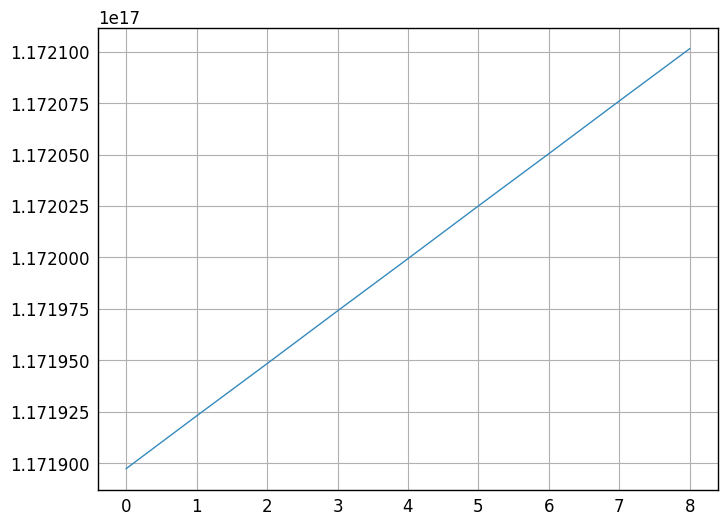

In [43]:
plt.plot(times)